### Spam detctor - Naive Bayes Maultinomial Classifier

In [1]:
# Import libraries
import numpy as np
import pandas as pd

In [8]:
# Read the spam email dataset
data = pd.read_csv('mail_data.csv')

In [9]:
# Print the head of dat5aframe
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [10]:
# Checking for null values
data.isnull().sum()

Category    0
Message     0
dtype: int64

There are no null values in data set

In [11]:
# Check the shape of dataframe
data.shape

(5572, 2)

In [12]:
# Check for duplicates
data.duplicated().sum()

415

In [13]:
# Drop duplicate data
data.drop_duplicates(keep='first', inplace=True)

In [14]:
# Check whether duplicates are droppecd
data.shape

(5157, 2)

## EDA

In [16]:
# Check the info of dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   object
 1   Message   5157 non-null   object
dtypes: object(2)
memory usage: 120.9+ KB


In [17]:
# Apply lambda function to labeling
data['Category'] = data['Category'].apply(lambda x: 1 if x=='spam' else 0)

In [18]:
# Verify the functionality of lambda function
data.sample(10)

,Category,Message
1933,0,Jus finished avatar nigro
818,0,Also are you bringing galileo or dobby
3935,0,How come guoyang go n tell her? Then u told her?
3601,0,I know you mood off today
2140,0,But i juz remembered i gotta bathe my dog today..
930,1,money!!! you r a lucky winner ! 2 claim your p...
3068,0,Ok. So april. Cant wait
968,0,What do u want when i come back?.a beautiful n...
445,0,HEY HEY WERETHE MONKEESPEOPLE SAY WE MONKEYARO...
2917,0,What time should I tell my friend to be around?


In [19]:
# Data type verifying
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5157 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5157 non-null   int64 
 1   Message   5157 non-null   object
dtypes: int64(1), object(1)
memory usage: 120.9+ KB


In [23]:
# Check whether how many spams and non-spams
data['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

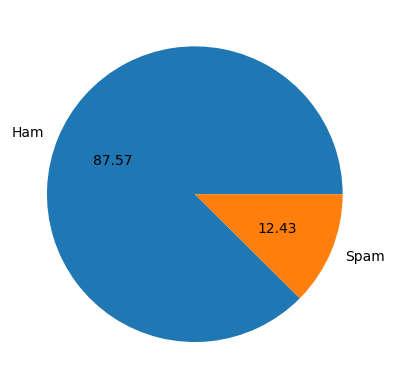

In [25]:
# Import libraries
import matplotlib.pyplot as plt

plt.pie(data['Category'].value_counts(), labels=['Ham','Spam'],autopct="%0.2f")
plt.show()

#### Data is imbalanced

## Import Natural Language ToolKit

In [26]:
pip install nltk

                                              0.0/1.5 MB ? eta -:--:--
                                              0.0/1.5 MB 1.4 MB/s eta 0:00:02
     -                                        0.1/1.5 MB 787.7 kB/s eta 0:00:02
     ----                                     0.2/1.5 MB 1.1 MB/s eta 0:00:02
     ------                                   0.2/1.5 MB 1.4 MB/s eta 0:00:01
     ----------                               0.4/1.5 MB 1.8 MB/s eta 0:00:01
     --------------                           0.5/1.5 MB 2.0 MB/s eta 0:00:01
     --------------------                     0.8/1.5 MB 2.4 MB/s eta 0:00:01
     -------------------------                1.0/1.5 MB 2.7 MB/s eta 0:00:01
     -------------------------------          1.2/1.5 MB 2.9 MB/s eta 0:00:01
     -------------------------------------    1.4/1.5 MB 3.1 MB/s eta 0:00:01
     ---------------------------------------- 1.5/1.5 MB 3.2 MB/s eta 0:00:00
                                              0.0/267.9 kB ? eta -:--

In [28]:
# Import libraries
import nltk
from nltk.corpus import stopwords

In [29]:
# Download the stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Tharindu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

## Data preprocessing

*   Lower case
*   Tokenization
*   Remove punctuation
*   Remove stopwords

In [30]:
# Import Strings
import string

In [31]:
# Import stemming
# Stemming use for language processing
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()

In [75]:
def transform_text(text):

    # Lower casing the text
    text = text.lower()
    # Tokenize the word
    # text = nltk.word_tokenize(text)
    
    # list for store words
    y = []

    # Remove special characters
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    # Removing stopwords
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
    # Return the list 
    return "".join(y)

In [79]:
def process_email(text):

  # Remove the punctuation
  no_punct = [char for char in text if char not in string.punctuation]
  no_punct = ''.join(no_punct)

  # Remove the stopwords
  clean_words = [word for word in no_punct.split() if word.lower() not in stopwords.words('english')]
  clean_words = " ".join(clean_words)

  # Return the list of clean text words
  return clean_words

In [78]:
# Verify the functionality of transform_text()
# get the data
text = data['Message'][10]
print(text)
print()
process_email(text)

I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today.



'Im gonna home soon dont want talk stuff anymore tonight k Ive cried enough today'

In [80]:
# Apply this method to dataframe
data['Processed data'] = data['Message'].apply(process_email)

In [81]:
# Verify that addition of new column
data.head()

,Category,Message,Processed data
0,0,"Go until jurong point, crazy.. Available only ...",Go jurong point crazy Available bugis n great ...
1,0,Ok lar... Joking wif u oni...,Ok lar Joking wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,Free entry 2 wkly comp win FA Cup final tkts 2...
3,0,U dun say so early hor... U c already then say...,U dun say early hor U c already say
4,0,"Nah I don't think he goes to usf, he lives aro...",Nah dont think goes usf lives around though


In [92]:
# Get the spam messages as list
spam_corpus = []
for msg in data[data['Category'] == 1]['Processed data'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
        

In [94]:
len(spam_corpus)

10607

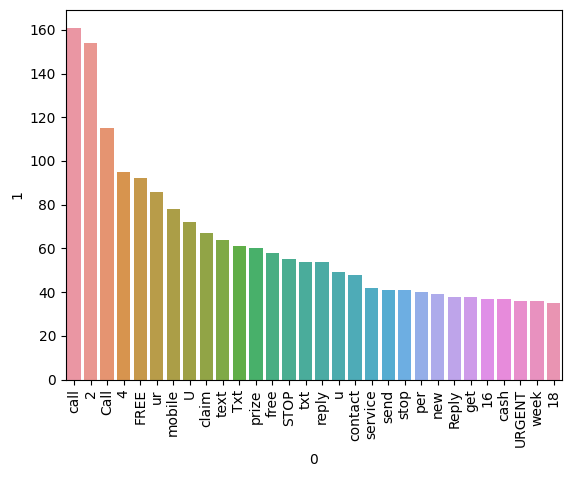

In [96]:
# Bar plot to see most common spam words
import seaborn as sns
from collections import Counter

sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0], y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [97]:
# Check for the ham mail waords
# Get the ham messages as list
ham_corpus = []
for msg in data[data['Category'] == 0]['Processed data'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [98]:
# Check the number of words
len(ham_corpus)

37254

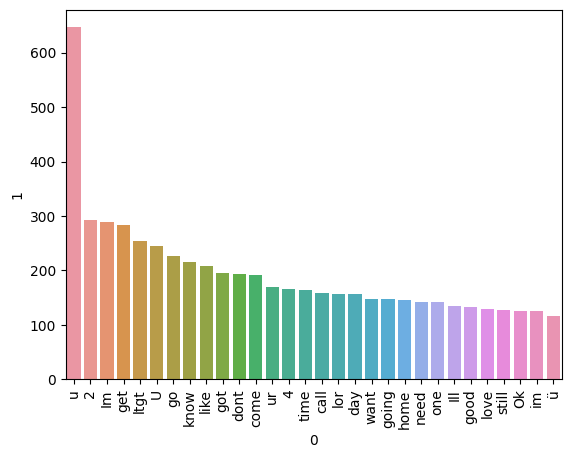

In [99]:
# Bar plot the ham words
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0], y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

### Model Builiding and training

In [110]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer

# Create vectorizers
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)

In [111]:
# Get the processed data as X variable

X = tfidf.fit_transform(data['Processed data']).toarray()

In [112]:
# Check the shape of X variable
X.shape

(5157, 3000)

In [113]:
# Get the Y data set
y = data['Category'].values

In [114]:
# Train test splitting
# Importing libraries
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [105]:
# Import libraries ralated to Naive bayes classifiers
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

# Import libraries that related to preformance metrics
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [115]:
# Create instances of classifiers
gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

In [107]:
# Gaussian Naive Bayes classifier

gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred1)}")
print(f"Precision : {precision_score(y_test,y_pred1)}")


Accuracy : 0.8856589147286822
Precision : 0.5213270142180095


In [116]:
# Multinomial Naive Bayes classifier

mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred2)}")
print(f"Precision : {precision_score(y_test,y_pred2)}")


Accuracy : 0.9786821705426356
Precision : 1.0


In [109]:
# Bernoulli Naive Bayes classifier

bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)

print(f"Accuracy : {accuracy_score(y_test,y_pred3)}")
print(f"Precision : {precision_score(y_test,y_pred3)}")


Accuracy : 0.9864341085271318
Precision : 1.0


In [117]:
# Store final model andvectorizer as pickel files
import pickle
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
pickle.dump(mnb, open('model.pkl', 'wb'))